In [1]:
import numpy as np
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Rectangle
from matplotlib import cm, colors
from tqdm import tqdm

import plotly.graph_objects as go
import plotly.io as pio
# pio.renderers.default = "browser"

plt.style.use("article.mplstyle")

np.set_printoptions(formatter={'all': lambda x: "{:.4e}".format(x)})

In [5]:
from plot import *
from electric_field import *
from utils import *
from lattice import *
from computation import *
from dynamics import *

In [9]:
Na = 1100
Nd = 20
Rd = 9
a = 0.25
theta = np.deg2rad(15)
E0 = 1e-3
w0 = 10
detuning = 1
incident_field = GaussianBeam(E0, theta, w0)

def excited_probabilities(scatterers: np.ndarray, incident_field: PlaneWave | GaussianBeam, detuning: float):
    """Compute the excited probabilities of the scatterers in the stationary regime.

    Args:
        scatterers (np.ndarray): Coordinates of the scatterers in the form of a 2D array with shape (Na, 3).
        incident_field (PlaneWave | GaussianBeam): Type of incident field.
        detuning (float): Detuning of the incident field.

    Returns:
        (np.ndarray): Excited probabilities of the scatterers in the form of a 2D array with shape (Na, 1).
    """
    Na = scatterers.shape[0]

    B = (1j / 2) * incident_field(scatterers)
    B = np.reshape(B, (Na, 1))

    norm = cdist(scatterers, scatterers, metric='euclidean')

    A = np.empty((Na, Na), dtype=np.complex64)

    A = -0.5 * expc(norm)
    A = A + np.diag(1j * detuning * np.ones(Na), 0)

    print(A)
    print(B)

    return np.linalg.solve(A, B)

scatterers = np.array([[0, 0, 0], [1, 1, 1], [2, 2, 2], [3, 3, 3]])
amplitudes = excited_probabilities(scatterers, incident_field, detuning)

scattered_field = ScatteredField(scatterers, amplitudes)
scattered_field(np.array([[5, 5, 5]]))

print(amplitudes)

[[-5.0000e-01+1.0000e+00j 4.5652e-02-5.1705e-03j -5.1377e-03-2.2390e-02j
  -1.4446e-02+5.0832e-03j]
 [4.5652e-02-5.1705e-03j -5.0000e-01+1.0000e+00j 4.5652e-02-5.1705e-03j
  -5.1377e-03-2.2390e-02j]
 [-5.1377e-03-2.2390e-02j 4.5652e-02-5.1705e-03j -5.0000e-01+1.0000e+00j
  4.5652e-02-5.1705e-03j]
 [-1.4446e-02+5.0832e-03j -5.1377e-03-2.2390e-02j 4.5652e-02-5.1705e-03j
  -5.0000e-01+1.0000e+00j]]
[[0.0000e+00+5.0000e-04j]
 [4.6976e-04-1.3087e-04j]
 [-2.3379e-04-3.8733e-04j]
 [-2.7420e-04+2.9020e-04j]]
[[4.0345e-04-2.1300e-04j]
 [-2.8591e-04-3.1648e-04j]
 [-2.0472e-04+3.2935e-04j]
 [3.1124e-04+1.0057e-04j]]


## Réflection sur le réseau à 10°

Lancer cette simulation cette nuit pour 5000 moyennes avec résolution 1000

In [ ]:
Na = 1100
Nd = 20
Rd = 9
a = 0.25
theta = np.deg2rad(15)
E0 = 1e-3
w0 = 4
detuning = 0
incident_field = GaussianBeam(E0, theta, w0)

d = periodicity_for_bragg_condition(theta)
disk_density = (Na/Nd)/(np.pi*(Rd**2)*a)

resolution = 300

save_param("output/2D_reflection/param.txt", Na, Nd, Rd, a, d, theta, disk_density, detuning, w0, E0)

I, x, z, scatterers = compute_mean_intensity(200, Na, Nd, Rd, d, a, incident_field, detuning, zoom=5, resolution=resolution)

np.save("output/2D_reflection/intensity.npy", (I/E0**2).reshape((resolution, resolution)))
np.save("output/2D_reflection/x.npy", x.reshape((resolution, resolution)))
np.save("output/2D_reflection/z.npy", z.reshape((resolution, resolution)))
np.save("output/2D_reflection/scatterers.npy", scatterers)

100%|██████████| 20/20 [00:37<00:00,  1.88s/it]


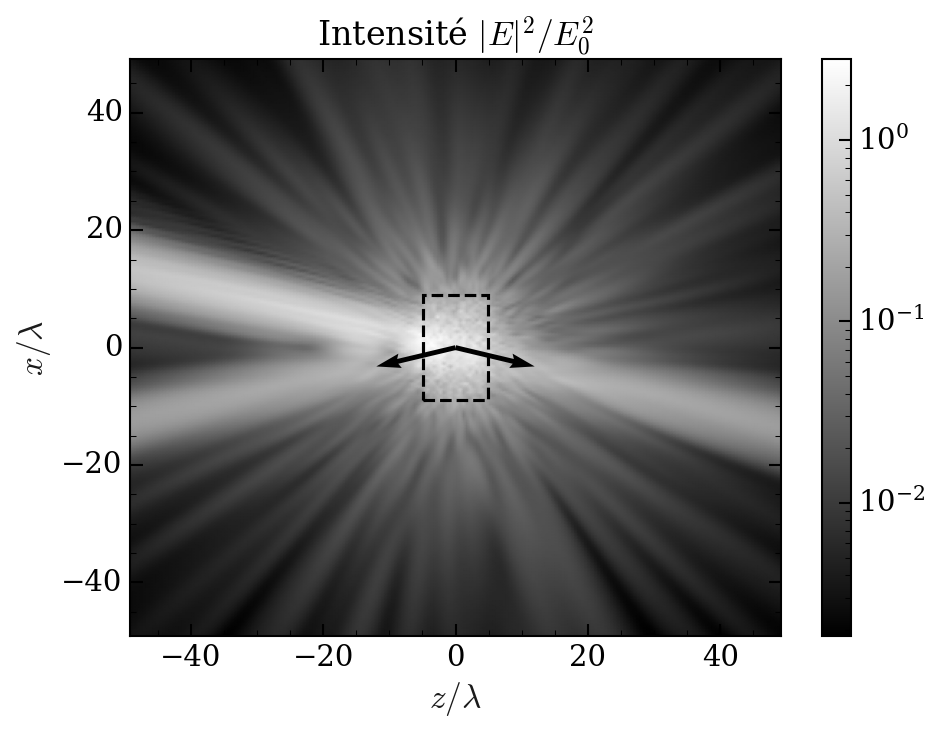

In [15]:
I = np.load("output/2D_reflection/intensity.npy")
x = np.load("output/2D_reflection/x.npy")
z = np.load("output/2D_reflection/z.npy")

show_intensity_xOz(I, x, z, scatterers,
                incident_field.k,
                bragg_direction(incident_field, d), cmap="gray")

## Mise en avant du minimum dans la direction de Bragg par éclairement à 90°

Lancer cette nuit pour 5000 moyennes avec une résolution de 150 000


In [14]:
# Minimum of intensity in bragg direction when light not in bragg direction

Na = 1100
Nd = 51
Rd = 9
a = 0.01
theta = np.deg2rad(90)
E0 = 1e-3
w0 = 4
detuning = 0.05
incident_field = GaussianBeam(E0, theta, w0)

d = periodicity_for_bragg_condition(np.deg2rad(60))
disk_density = (Na/Nd)/(np.pi*(Rd**2)*a)


save_param("output/3D_band_gap/param.txt", Na, Nd, Rd, a, d, theta, disk_density, detuning, w0, E0)

I, r = compute_mean_angular_intensity_fibonacci(100, Na, Nd, Rd, d, a, detuning, incident_field, resolution=80000, distance=200)
I /= E0**2
x = r[:, 0]
y = r[:, 1]
z = r[:, 2]

np.save("output/3D_band_gap/intensity.npy", I)
np.save("output/3D_band_gap/x.npy", x)
np.save("output/3D_band_gap/y.npy", y)
np.save("output/3D_band_gap/z.npy", z)


100%|██████████| 100/100 [06:31<00:00,  3.91s/it]


In [8]:
I = np.load("output/3D_band_gap/intensity.npy")
x = np.load("output/3D_band_gap/x.npy")
y = np.load("output/3D_band_gap/y.npy")
z = np.load("output/3D_band_gap/z.npy")

show_intensity_3D_plotly_scatter(I, x, y, z, 200, [])

# Intensité dans direction de Bragg selon période du réseau

In [9]:
Na = 1000
Nd = 50
Rd = 9
a = 0.01
theta = np.deg2rad(90)
E0 = 1e-3
w0 = 4
detuning = 0.1
incident_field = GaussianBeam(E0, theta, w0)

d = periodicity_for_bragg_condition(np.deg2rad(60))
disk_density = (Na/Nd)/(np.pi*(Rd**2)*a)

save_param("output/bragg_periodicity/param.txt", Na, Nd, Rd, a, d, theta, disk_density, detuning, w0, E0)

I, r = compute_mean_angular_intensity_fibonacci(100, Na, Nd, Rd, d, a, detuning, incident_field, resolution=80000, distance=200)
I /= E0**2
x = r[:, 0]
y = r[:, 1]
z = r[:, 2]

np.save("output/bragg_periodicity/intensity.npy", I)
np.save("output/bragg_periodicity/x.npy", x)
np.save("output/bragg_periodicity/y.npy", y)
np.save("output/bragg_periodicity/z.npy", z)

 13%|█▎        | 13/100 [00:48<05:22,  3.71s/it]


KeyboardInterrupt: 

# Dynamique temporelle : poids des différents taux de décroissance sur l'état stationnaire

In [5]:
# ========= Eigenvalues for a specific configuration ==========
Na = 1000
Nd = 10
Rd = 9
a = 0.01
theta = np.deg2rad(10)
E0 = 1e-3
w0 = 4
detuning = 0
incident_field = GaussianBeam(E0, theta, w0)

d = periodicity_for_bragg_condition(theta)
disk_density = (Na/Nd)/(np.pi*(Rd**2)*a)

# print_param(Na, Nd, Rd, a, d, theta, disk_density)

# ==========================================================

100%|██████████| 1/1 [00:07<00:00,  7.19s/it]


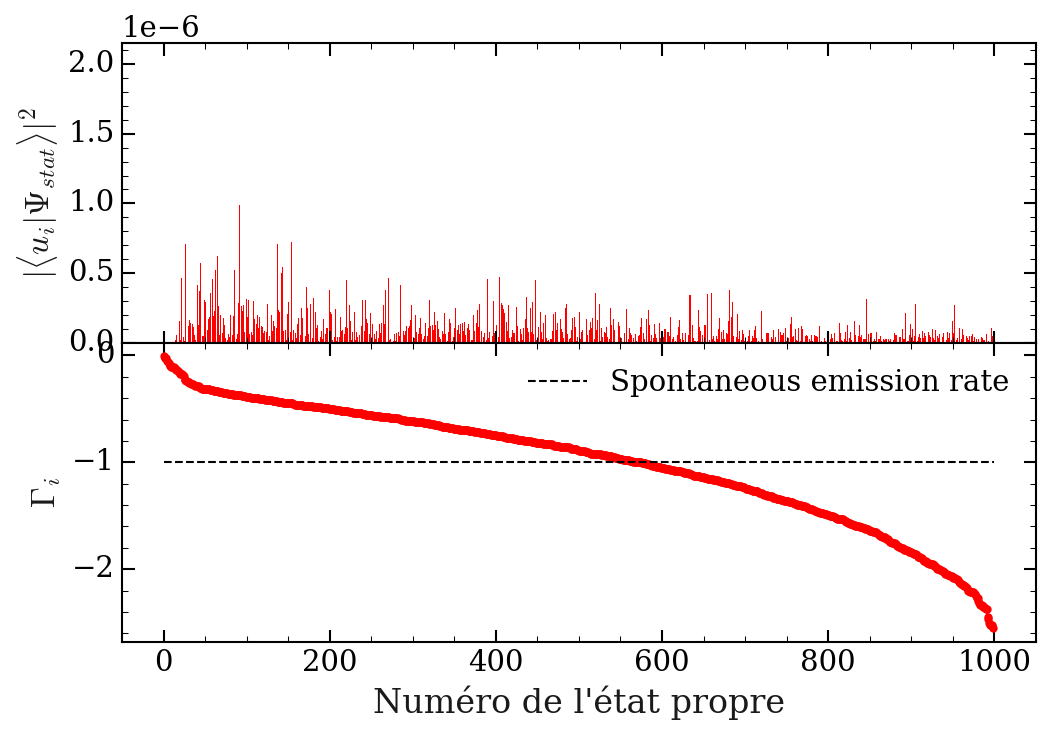

In [ ]:
ith_vector = np.arange(Na)
gs = GridSpec(2, 1, hspace=0)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0], sharex=ax1)

for i in tqdm(range(1)):
    scatterers = centered_optical_lattice(Na, Nd, Rd, d, a)
    amplitudes = excited_probabilities(scatterers, incident_field, detuning)

    M = compute_gamma_matrix(scatterers)
    M *= -0.5

    V, P = np.linalg.eig(M)

    decomposition = np.abs(np.dot(np.conjugate(P).T, amplitudes.reshape(-1, 1)))**2
    idx = np.argsort(-np.real(V), axis=0)
    V = V[idx]
    decomposition = decomposition[idx]

    ax1.bar(ith_vector, decomposition.flatten(), color="red")

    ax2.plot(ith_vector, 2*np.real(V).flatten(), color="red", marker="o", markersize=4)

ax1.set_ylabel("$|\\langle u_i | \\Psi_{stat} \\rangle |^2$")
ax2.set_xlabel("Numéro de l'état propre")
ax2.set_ylabel("$\\Gamma_i$")
ax2.hlines(-1, 0, Na, color="black", linestyle="--", label="Spontaneous emission rate")
ax2.legend(fancybox=False, framealpha=0)
plt.tight_layout()
plt.savefig("1000scat.png", dpi=300)
plt.show()

# Dynamique : Taux de décroissance selon nombre d'atomes

n = 1
n = 51
n = 101
n = 151
n = 201
n = 251
n = 301
n = 351
n = 401
n = 451
n = 501
n = 551
n = 601
n = 651
n = 701
n = 751
n = 801
n = 851
n = 901
n = 951


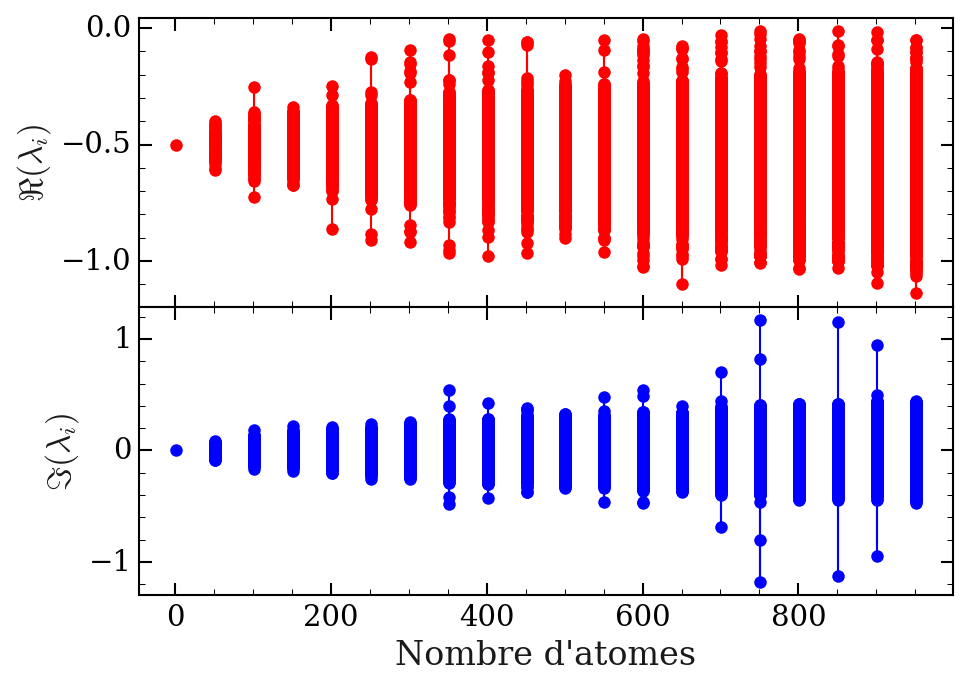

In [ ]:
# ============ Plotting eigenvalues in function of the number of scatterers ============
Na = 0
Nd = 20
Rd = 9
a = 0.25
theta = np.deg2rad(10)
E0 = 1e-3
w0 = 4
detuning = 0
incident_field = GaussianBeam(E0, theta, w0)

d = periodicity_for_bragg_condition(theta)
disk_density = (Na/Nd)/(np.pi*(Rd**2)*a)

Na = np.arange(1, 1000, 50)

gs = GridSpec(2, 1, hspace=0)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0], sharex=ax1)

for n in Na:
    scatterers = centered_optical_lattice(n, Nd, Rd, d, a)
    amplitudes = excited_probabilities(scatterers, incident_field, detuning)

    M = compute_gamma_matrix(scatterers)
    M *= -0.5

    t1, beta1, P, V = compute_time_evolution_exact_diagonalization(M, amplitudes)

    ax1.plot(n * np.ones(n), np.real(V).flatten(), color="red", marker="o")
    ax2.plot(n * np.ones(n), np.imag(V).flatten(), color="blue", marker="o")

ax2.set_ylabel("$\\Im (\\lambda_i)$")
ax1.set_ylabel("$\\Re (\\lambda_i)$")
ax2.set_xlabel("Nombre d'atomes")
plt.show()


## Taux de décroissance moyen selon le nombre d'atomes

In [ ]:
Na = 0
Nd = 20
Rd = 9
a = 0.25
theta = np.deg2rad(10)
E0 = 1e-3
w0 = 4
detuning = 0
incident_field = GaussianBeam(E0, theta, w0)

d = periodicity_for_bragg_condition(theta)
disk_density = (Na/Nd)/(np.pi*(Rd**2)*a)

Na = np.arange(1, 50, 1)

gs = GridSpec(1, 1, hspace=0)
ax1 = plt.subplot(gs[0, 0])

gamma = np.zeros_like(Na, dtype=np.float64)

for i, n in enumerate(Na):
    print(f"n = {n}")
    for j in range(2):
        scatterers = centered_optical_lattice(n, Nd, Rd, d, a)
        amplitudes = excited_probabilities(scatterers, incident_field, detuning)

        M = compute_gamma_matrix(scatterers)
        M *= -0.5

        V, P = np.linalg.eig(M)

        decomposition = np.abs(np.dot(np.conjugate(P).T, amplitudes.reshape(-1, 1)))**2
        gamma[i] -= 2 * np.mean(np.real(V).flatten() * decomposition.flatten()) / np.sum(np.abs(decomposition.flatten()))
    gamma[i] /= 2

ax1.plot(Na, gamma, color="red", marker="o")
ax1.set_ylabel("$\\langle \\Gamma_i \\rangle$")
ax1.set_xlabel("Nombre d'atomes")
plt.show()


# Décroissance temporelle

In [4]:
def create_spherical_region(theta: np.ndarray, phi: np.ndarray, distance: float) -> np.ndarray:
    """ Creates a spherical region in 3D space.
    The spherical region is defined by the angles theta and phi, and the distance from the origin.

    Args:
        theta (np.ndarray): Angle(s) theta [0, pi] where we want to create the spherical region.
        phi (np.ndarray): Angle(s) phi [0, 2*pi] where we want to create the spherical region.
        distance (float): Radius of the spherical region.

    Returns:
        np.ndarray: (N, 3) array of points in the spherical region; N is the number of points (N = len(theta) * len(phi)).
    """
    tt, pp = np.meshgrid(theta, phi)
    x = distance * np.sin(tt) * np.cos(pp)
    y = distance * np.sin(tt) * np.sin(pp)
    z = distance * np.cos(tt)
    r = np.hstack((x.reshape(-1, 1), y.reshape(-1, 1), z.reshape(-1, 1)))

    return r

def create_line(theta_min: float, theta_max: float, D) -> np.ndarray:
    """ Creates a line in 3D space.

    Args:
        theta_min (float): Minimum angle theta [0, pi] where we want to create the line.
        theta_max (float): Maximum angle theta [0, pi] where we want to create the line.

    Returns:
        np.ndarray: (N, 3) array of points in the line; N is the number of points.
    """
    phi = np.linspace(0, 2 * np.pi, 100)
    x_inf = D * np.sin(theta_min) * np.cos(phi)
    y_inf = D * np.sin(theta_min) * np.sin(phi)
    z_inf = D * np.cos(theta_min)

    x_sup = D * np.sin(theta_max) * np.cos(phi)
    y_sup = D * np.sin(theta_max) * np.sin(phi)
    z_sup = D * np.cos(theta_max)

    return x_inf, y_inf, z_inf, x_sup, y_sup, z_sup


def compute_time_intensity(incident_field: PlaneWave | GaussianBeam, scatterers: np.ndarray, amplitudes: np.ndarray, r: np.ndarray, out=None):
    """ Computes the time evolution of the intensity of the field.

    Args:
        scatterers (np.ndarray): Scatterers positions in 3D space (shape (Na, 3)).
        amplitudes (np.ndarray): Amplitudes of the scattered field (shape (Na, Nt)).
        r (np.ndarray): Points in 3D space where we want to compute the intensity (shape (N, 3)).

    Returns:
        np.ndarray: Time evolution of the intensity of the field (shape (Nt,)).
    """

    Nt = amplitudes.shape[1]

    if out is None:
        I = np.empty((Nt,), dtype=np.float64)

    for i in range(Nt):
        scattered_field = ScatteredField(scatterers, amplitudes[:, i])
        I[i] = np.mean(np.abs(scattered_field(r) + incident_field(r))**2)

    return I

def model(x, a, b) -> float:
    """ Model for the time evolution of the intensity of the field at short times.

    Args:
        x (float): Input coordinates.
        y (float): Output coordinates.

    Returns:
        float: Time evolution of the intensity of the field.
    """
    return a*np.exp(-b*x)

def gamma_short_time(t, I) -> float:
    popt, pcov = curve_fit(model, t, I)
    return popt

In [49]:
Na = 1000
Nd = 50
Rd = 9
a = 0.01
theta = np.deg2rad(90)
E0 = 1e-3
w0 = 4
detuning = 0.05
incident_field = GaussianBeam(E0, theta, w0)

d = periodicity_for_bragg_condition(np.deg2rad(60))
disk_density = (Na/Nd)/(np.pi*(Rd**2)*a)

# Coordinates to evaluate the intensity
D = 200
theta_min = np.deg2rad(63)
theta_max = np.deg2rad(67)

r_bragg = create_spherical_region(np.linspace(theta_min, theta_max, 20), np.linspace(0, 2 * np.pi, 20), D)
r_nbragg = create_spherical_region(np.linspace(np.deg2rad(30), np.deg2rad(35), 5), np.linspace(0, 2 * np.pi, 5), D)

In [25]:
save_param("output/Gamma/param.txt", Na, Nd, Rd, a, d, theta, disk_density, detuning, w0, E0)

I, r = compute_mean_angular_intensity_fibonacci(100, Na, Nd, Rd, d, a, detuning, incident_field, resolution=80000, distance=D)
I /= E0**2
x = r[:, 0]
y = r[:, 1]
z = r[:, 2]

np.save("output/Gamma/intensity.npy", I)
np.save("output/Gamma/x.npy", x)
np.save("output/Gamma/y.npy", y)
np.save("output/Gamma/z.npy", z)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [06:31<00:00,  3.91s/it]


In [50]:
MEAN_ITERATIONS = 100
Nt = 500
t = np.linspace(0, 5, Nt)
I_bragg = np.zeros((Nt,), dtype=np.float64)
I_nbragg = np.zeros((Nt,), dtype=np.float64)

for i in tqdm(range(MEAN_ITERATIONS)):
    scatterers = centered_optical_lattice(Na, Nd, Rd, d, a)
    amplitudes = excited_probabilities(scatterers, incident_field, detuning)

    M = compute_gamma_matrix(scatterers)
    M *= -0.5

    V, P = np.linalg.eig(M)

    betat = compute_time_evolution_exact_diagonalization(P, V, amplitudes, t=t)

    I_bragg += compute_time_intensity(incident_field, scatterers, betat, r_bragg)
    I_nbragg += compute_time_intensity(incident_field, scatterers, betat, r_nbragg)

I_bragg /= MEAN_ITERATIONS
I_nbragg /= MEAN_ITERATIONS

100%|██████████| 100/100 [21:13<00:00, 12.73s/it]


[2.8190e-11 1.1619e+00]
[3.2744e-11 1.2046e+00]


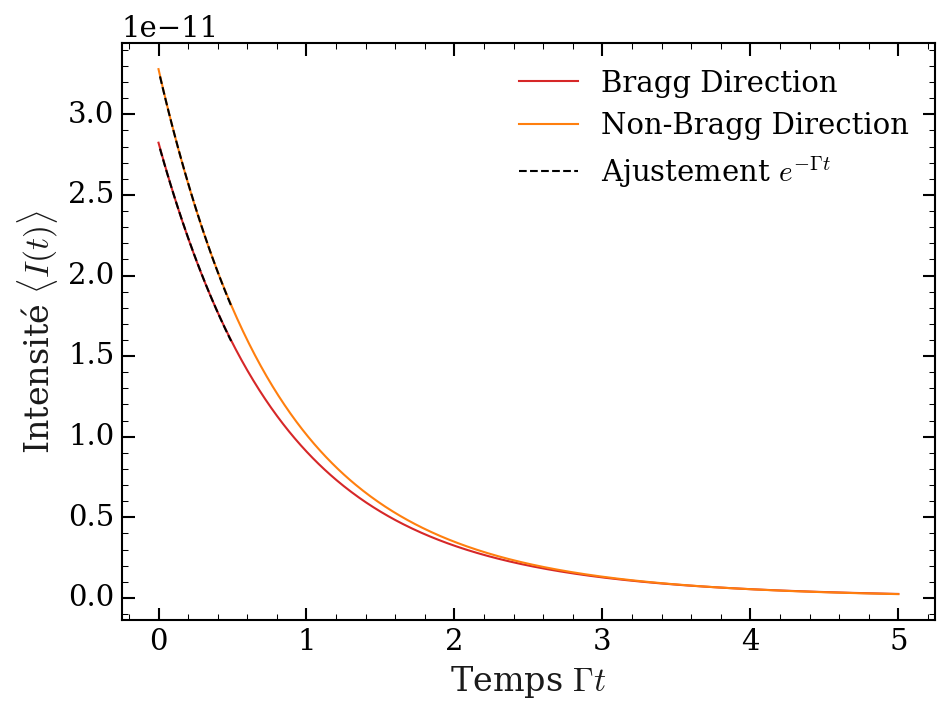

In [52]:
popt1 = gamma_short_time(t[1:50], I_bragg[1:50])
popt2 = gamma_short_time(t[1:50], I_nbragg[1:50])
print(popt1)
print(popt2)
# bis(I, x, y, z, D, [np.deg2rad(90), np.deg2rad(90)])

plt.plot(t, I_bragg, label="Bragg Direction")
plt.plot(t, I_nbragg, label="Non-Bragg Direction")
plt.plot(t[1:50], model(t[1:50], *popt1), color="black", linestyle="--", label="Ajustement $e^{-\\Gamma t}$")
plt.plot(t[1:50], model(t[1:50], *popt2), color="black", linestyle="--")
plt.xlabel("Temps $\\Gamma t$")
plt.ylabel("Intensité $\\langle I(t) \\rangle$")
plt.legend(fancybox=False, framealpha=0)
plt.show()